In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_excel('NGA_Data_Full.xlsx')
data['logPGA']= np.log10(data['PGA'])
data['logRrup']= np.log10(data['Rrup'])
data['logVs30']= np.log10(data['Vs30'])
#data['Mw2']= np.power((data['Mw']),2)
#con=data['FM']==1
#tt=data[con]
data.head(10)

,PGA,PGV,Mw,FM,Vs30,Rrup,logPGA,logRrup,logVs30
0,0.052746,8.5444,7.36,3,316.46,117.75,-1.277810,2.070961,2.500319
1,0.058666,7.1982,6.19,1,408.93,17.64,-1.231614,1.246499,2.611649
2,0.378930,23.5450,6.19,1,289.56,9.58,-0.421441,0.981366,2.461739
3,0.247240,11.6330,6.19,1,256.82,12.90,-0.606881,1.110590,2.409629
4,0.287260,16.5210,6.19,1,527.92,15.96,-0.541725,1.203033,2.722568
5,0.067895,3.7417,5.33,3,477.22,22.94,-1.168162,1.360593,2.678719
6,0.166890,5.0801,5.33,3,667.13,20.24,-0.777570,1.306211,2.824210
7,0.031274,5.5043,6.61,3,280.56,55.20,-1.504817,1.741939,2.448026
8,0.071213,4.7830,6.61,3,235.00,61.79,-1.147441,1.790918,2.371068
9,0.286720,22.1830,6.61,3,450.28,22.63,-0.542542,1.354685,2.653483


In [ ]:
X = data.drop(['PGA','Rrup','Vs30', 'logPGA', 'PGV'], axis=1)
y=data['logPGA']
Y=pd.DataFrame(y)
X.head()

,Mw,FM,logRrup,logVs30
0,7.36,3,2.070961,2.500319
1,6.19,1,1.246499,2.611649
2,6.19,1,0.981366,2.461739
3,6.19,1,1.110590,2.409629
4,6.19,1,1.203033,2.722568


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators = 10, random_state=0)
RF.fit(xtrain,ytrain)
ypred=RF.predict(xtest)

In [ ]:
from sklearn import metrics
RF=RandomForestRegressor(n_estimators = 700, random_state=50)
RF.fit(xtrain,ytrain)
ypred=RF.predict(xtest)
from array import array 
res_pred = array("f", ypred)

ytest= ytest.to_numpy()

from array import array
res = array("f", ytest)

diff = np.subtract(res_pred, res) 

import math
RSS = np.sum(np.square(diff))
RSE = math.sqrt(RSS / (len(diff) - 1))
R2= metrics.r2_score(ytest, ypred)
R2

0.9111702437602571

# Total

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X) 

In [ ]:
ypred_all = RF.predict(X)
#ypred_all

from array import array 
ypred_array_all = array("f", ypred_all)
ypred_array_all
Y= Y.to_numpy()
from array import array
Y_all = array("f", Y)
Y_all

diffT = np.subtract(ypred_array_all, Y_all) 

import math
RSST = np.sum(np.square(diffT))
RSET = math.sqrt(RSST / (len(Y) - 1))
print("Standard Deviation is:", RSET)

Standard Deviation is: 0.24022769126632285


In [ ]:
Residuals_dft=pd.DataFrame(diffT)
Residuals_dft.describe()
Residuals_dft.rename( columns={0 :'Residuals'}, inplace=True )
Residuals_dft.describe(include = 'all')

,Residuals
count,13555.000000
mean,0.009866
std,0.240025
min,-1.645449
25%,-0.111235
50%,0.001418
75%,0.120629
max,1.503320


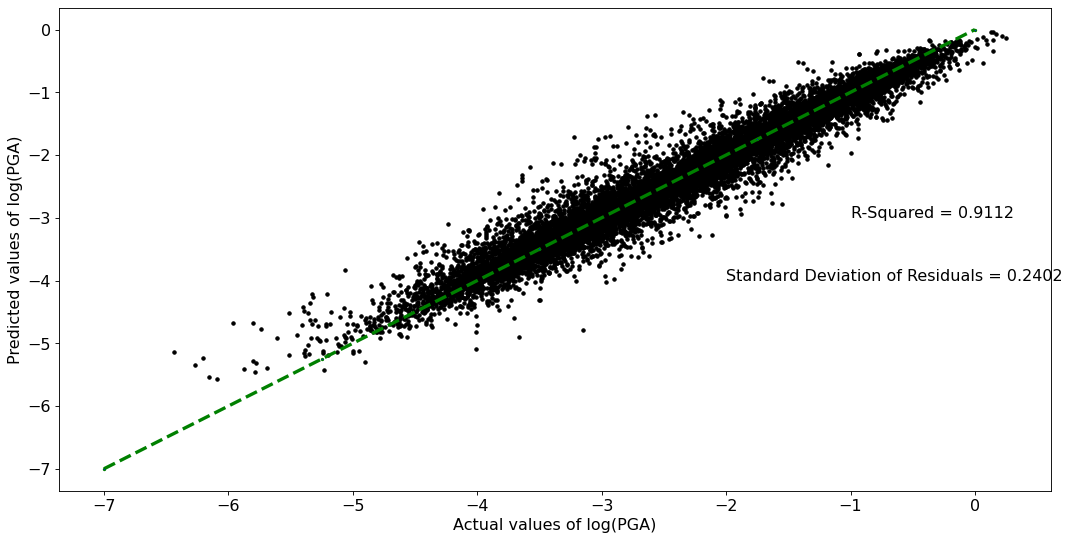

In [ ]:
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
         
pylab.rcParams.update(params)

YPRED = RF.predict(X)
YPRED=pd.DataFrame(YPRED)
YPRED.rename( columns={0 :'logPGA'}, inplace=True )
YPRED.describe(include = 'all')

xx= np.linspace(-7.0, 0.0, num= 5)
yy= xx

plt.figure(figsize=(16,8), dpi=80)
plt.plot(data['logPGA'], YPRED['logPGA'], 'k.')
plt.plot(xx, yy, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=2)

plt.xlabel('Actual values of log(PGA)')
plt.ylabel('Predicted values of log(PGA)')
plt.text(-1, -3, 'R-Squared = %0.4f' % R2, fontsize= 'x-large')
plt.text(-2, -4, 'Standard Deviation of Residuals = %0.4f' % RSET, fontsize= 'x-large')

plt.savefig("R2_RF.jpeg")

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array1 = [[0]*my_cols]*my_rows
my_array1= np.array(my_array1, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array1[i][j]=6
    elif j==1:
      my_array1[i][j]=1
    elif j==2:
      my_array1[i][j]=np.log10(i+2)
    else:
        my_array1[i][j]=3.0530

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array2 = [[0]*my_cols]*my_rows

import numpy as np
my_array2= np.array(my_array2, dtype=float)


for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array2[i][j]=6
    elif j==1:
      my_array2[i][j]=1
    elif j==2:
      my_array2[i][j]=np.log10(i+2)
    else:
        my_array2[i][j]=2.7481 

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array3 = [[0]*my_cols]*my_rows

import numpy as np
my_array3= np.array(my_array3, dtype=float)


for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array3[i][j]=6
    elif j==1:
      my_array3[i][j]=1
    elif j==2:
      my_array3[i][j]=np.log10(i+2)
    else:
        my_array3[i][j]=2.4313

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array4 = [[0]*my_cols]*my_rows

import numpy as np
my_array4= np.array(my_array4, dtype=float)


for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array4[i][j]=6
    elif j==1:
      my_array4[i][j]=1
    elif j==2:
      my_array4[i][j]=np.log10(i+2)
    else:
        my_array4[i][j]=2

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array5 = [[0]*my_cols]*my_rows
my_array5= np.array(my_array5, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array5[i][j]=6
    elif j==1:
      my_array5[i][j]=1
    elif j==2:
      my_array5[i][j]=np.log10(i+2)
    else:
        my_array5[i][j]=3.3

In [ ]:
pred1 = RF.predict(my_array1)
pred2 = RF.predict(my_array2)
pred3 = RF.predict(my_array3)
pred4 = RF.predict(my_array4)
pred5 = RF.predict(my_array5)

In [ ]:
xdf1=pd.DataFrame(my_array1)
xdf1.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup1', 3: 'logVs30'}, inplace=True )

xdf2=pd.DataFrame(my_array2)
xdf2.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf3=pd.DataFrame(my_array3)
xdf3.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf4=pd.DataFrame(my_array4)
xdf4.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf5=pd.DataFrame(my_array5)
xdf5.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

In [ ]:
pdf1=pd.DataFrame(pred1)
pdf1.rename( columns={0 :'logPGA'}, inplace=True )
pdf1['PGA']= 10**pdf1['logPGA']

pdf2=pd.DataFrame(pred2)
pdf2.rename( columns={0 :'logPGA'}, inplace=True )
pdf2['PGA']= 10**pdf2['logPGA']

pdf3=pd.DataFrame(pred3)
pdf3.rename( columns={0 :'logPGA'}, inplace=True )
pdf3['PGA']= 10**pdf3['logPGA']

pdf4=pd.DataFrame(pred4)
pdf4.rename( columns={0 :'logPGA'}, inplace=True )
pdf4['PGA']= 10**pdf4['logPGA']

pdf5=pd.DataFrame(pred5)
pdf5.rename( columns={0 :'logPGA'}, inplace=True )
pdf5['PGA']= 10**pdf5['logPGA']

In [ ]:
r= np.arange(0,500)
rdf=pd.DataFrame(r)
rdf.rename( columns={0 :'Rrup'}, inplace=True )

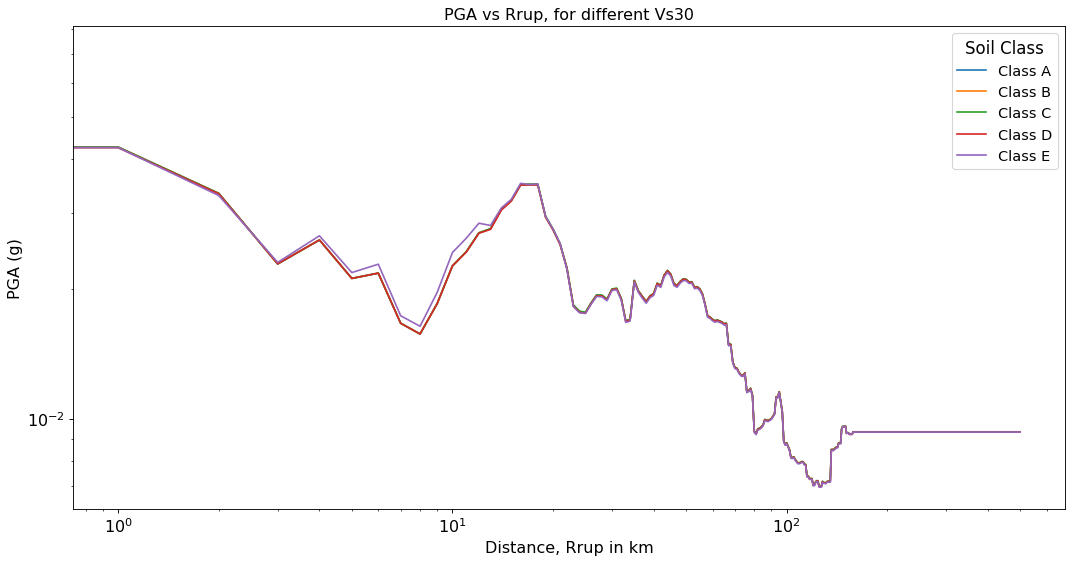

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import seaborn as sns
plt.figure(figsize=(16,8), dpi=80)
sns.lineplot(rdf['Rrup'],pdf5['PGA'], label='Class A')
sns.lineplot(rdf['Rrup'],pdf1['PGA'], label='Class B')
sns.lineplot(rdf['Rrup'],pdf2['PGA'], label='Class C') #hue=X_new['Mw']) 
sns.lineplot(rdf['Rrup'],pdf3['PGA'], label='Class D') 
sns.lineplot(rdf['Rrup'],pdf4['PGA'], label='Class E') 
plt.xlabel('Distance, Rrup in km')
plt.ylabel('PGA (g)')
plt.title('PGA vs Rrup, for different Vs30')
plt.xscale("log")
plt.yscale("log")
#plt.savefig("PGA_Rrup_Mw.jpeg")
fontsize = 13
legend=plt.legend(title='Soil Class', loc="upper right", frameon=True, fontsize=fontsize)
legend.get_title().set_fontsize('15')

plt.savefig("For different Vs30_updated.jpeg")

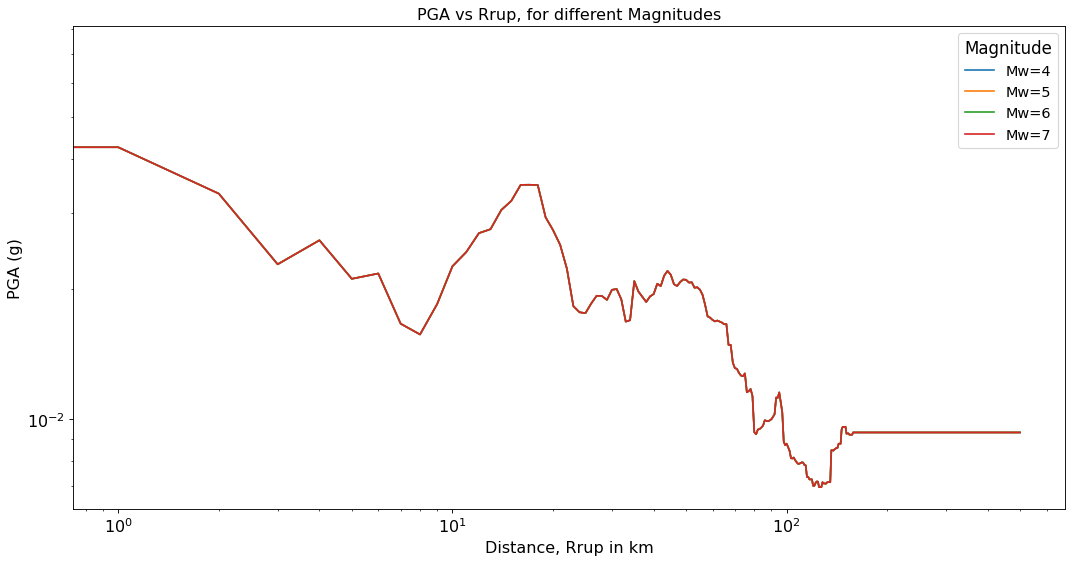

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array1 = [[0]*my_cols]*my_rows
my_array1= np.array(my_array1, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array1[i][j]=4
    elif j==1:
      my_array1[i][j]=1
    elif j==2:
      my_array1[i][j]=np.log10(i+2)
    else:
        my_array1[i][j]=3

my_array2 = [[0]*my_cols]*my_rows
my_array2= np.array(my_array2, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array2[i][j]=5
    elif j==1:
      my_array2[i][j]=1
    elif j==2:
      my_array2[i][j]=np.log10(i+2)
    else:
        my_array2[i][j]=3

my_array3 = [[0]*my_cols]*my_rows
my_array3= np.array(my_array3, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array3[i][j]=6
    elif j==1:
      my_array3[i][j]=1
    elif j==2:
      my_array3[i][j]=np.log10(i+2)
    else:
        my_array3[i][j]=3

my_array4 = [[0]*my_cols]*my_rows
my_array4= np.array(my_array4, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array4[i][j]=7
    elif j==1:
      my_array4[i][j]=1
    elif j==2:
      my_array4[i][j]=np.log10(i+2)
    else:
        my_array4[i][j]=3                        


pred1 = RF.predict(my_array1)
pred2 = RF.predict(my_array2)
pred3 = RF.predict(my_array3)
pred4 = RF.predict(my_array4)


xdf1=pd.DataFrame(my_array1)
xdf1.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup1', 3: 'logVs30'}, inplace=True )

xdf2=pd.DataFrame(my_array2)
xdf2.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf3=pd.DataFrame(my_array3)
xdf3.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf4=pd.DataFrame(my_array4)
xdf4.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )


pdf1=pd.DataFrame(pred1)
pdf1.rename( columns={0 :'logPGA'}, inplace=True )
pdf1['PGA']= 10**pdf1['logPGA']

pdf2=pd.DataFrame(pred2)
pdf2.rename( columns={0 :'logPGA'}, inplace=True )
pdf2['PGA']= 10**pdf2['logPGA']

pdf3=pd.DataFrame(pred3)
pdf3.rename( columns={0 :'logPGA'}, inplace=True )
pdf3['PGA']= 10**pdf3['logPGA']

pdf4=pd.DataFrame(pred4)
pdf4.rename( columns={0 :'logPGA'}, inplace=True )
pdf4['PGA']= 10**pdf4['logPGA']


import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import seaborn as sns
plt.figure(figsize=(16,8), dpi=80)
sns.lineplot(rdf['Rrup'],pdf1['PGA'], label='Mw=4')
sns.lineplot(rdf['Rrup'],pdf2['PGA'], label='Mw=5')
sns.lineplot(rdf['Rrup'],pdf3['PGA'], label='Mw=6') #hue=X_new['Mw']) 
sns.lineplot(rdf['Rrup'],pdf4['PGA'], label='Mw=7') 

plt.xlabel('Distance, Rrup in km')
plt.ylabel('PGA (g)')
plt.title('PGA vs Rrup, for different Magnitudes')
plt.xscale("log")
plt.yscale("log")

fontsize = 13
legend=plt.legend(title='Magnitude', loc="upper right", frameon=True, fontsize=fontsize)
legend.get_title().set_fontsize('15')
plt.savefig("For different Mw_updated.jpeg")